# Linear Regression Exercises

### DOWNLOADING LIBRARY

In [34]:
 !pip install pandas 

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


### Let's load the data and understand it

In [1]:
import pickle as pickle

In [2]:
# Specify the path to your CSV file
csv_file_path = 'car_dataset.csv'

In [36]:
# import all necessary packages
import pandas as pd

In [4]:
# load data to a new dataframe
df = pd.read_csv(csv_file_path)

In [5]:
# check the shape
df.shape

(205, 26)

In [6]:
# first five rows of the dataframe
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# describe the dataframe with some statistical info
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# check data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# check unique data for each feature in the dataframe
df.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
# column names of the dataframe
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Now, we can prepare the data for the linear regression model

In [11]:
# create a new simple dataframe using the existing one
new_df = df[['enginesize', 'price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


<Axes: xlabel='enginesize', ylabel='price'>

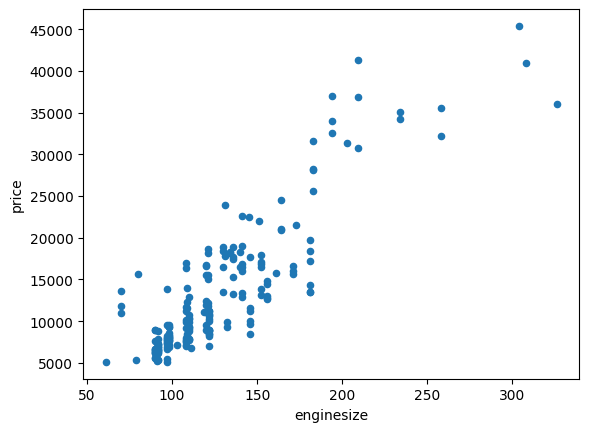

In [12]:
# check the distribution of data by plotting as scatter
new_df.plot(x='enginesize', y='price', kind='scatter')

<Axes: xlabel='fueltypes', ylabel='price'>

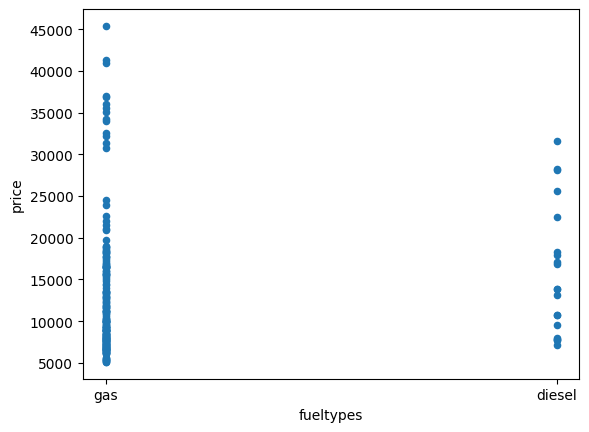

In [13]:
# compare below plot with the previous one
df.plot(x='fueltypes', y='price', kind='scatter')

In [14]:
# define x and y by using the new dataframe
x = new_df['enginesize']
y = new_df['price']

### Now Machine Learning

In [15]:
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164,)
X_test: (41,)
Y_train: (164,)
Y_test: (41,)


In [18]:
# create a linear regression model
model = LinearRegression()


In [19]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [20]:
# print coefficient
model.coef_

array([164.31545172])

In [21]:
# print y_intercept | bias
model.intercept_

-7613.370939489788

In [22]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

In [23]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  16835544.03813768


In [24]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  4103.113944084137


In [25]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  3195.0312395000437


In [26]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.7825324721447274


In [27]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  16835544.03813768
RMSE -->  4103.113944084137
MAE -->  3195.0312395000437
R2 -->  0.7825324721447274


In [28]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

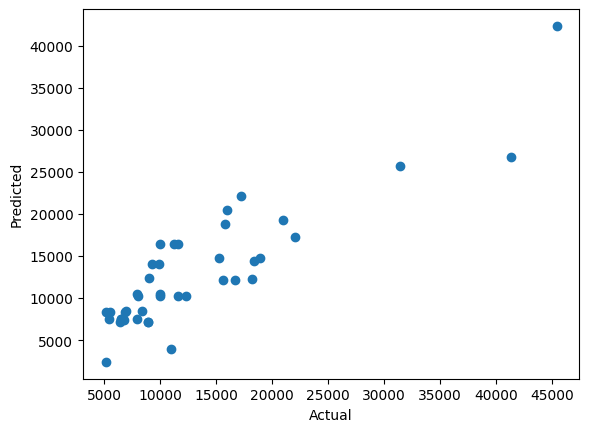

In [29]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='enginesize', ylabel='price'>

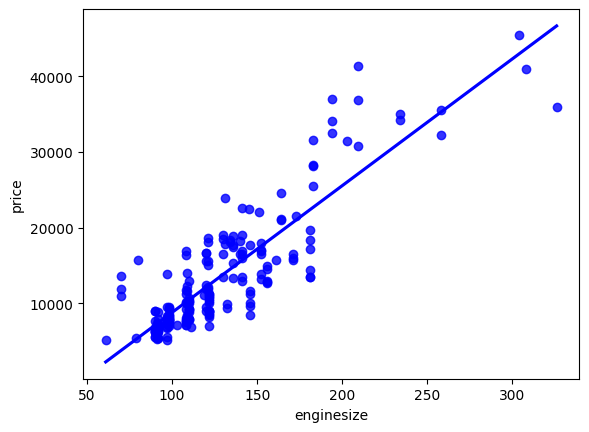

In [30]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

In [31]:
## Save the trained model to a file using pickle
model_filename = 'linear_regression_model.pkl' 
with open(model_filename, 'wb') as file: 
    pickle.dump(model, file)
print(f'Model saved to {model_filename}')

Model saved to linear_regression_model.pkl


In [32]:
# Load the saved model
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use loaded_model for predictions

In [33]:
# Use the loaded model for predictions
predictions = loaded_model.predict(x_test)

# Print or use the predictions as needed
print(predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[ 91. 161. 136.  61. 109. 146.  92.  92. 181.  92. 164. 203.  70. 134.
  90. 146. 132. 136. 110.  92. 110. 120. 132. 146. 171.  97.  98. 120.
  98.  97. 109. 109. 151. 122.  97. 209. 109. 121.  90. 304.  90.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.